In [1]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="white",color_codes=True)
df = pd.read_csv('dataset.csv')
df.head()

,Class,excessive,quit-unsuccessful,loss-focus,reduction,engaging-risky,guilt-shame,cycles,health-issue,demanding,lost-attraction,physical-pain,feeling-distracted,a-u-issue-r,cope-feelings,sex-life-less-satisfying,lost-interest,obsessive-thoughts,Feeling-withdrawal
0,addicted,1,1,1,0,0,1,1,0,1,0,0,1,0,0,0,1,1,1
1,not-addicted,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,not-addicted,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,not-addicted,1,0,1,1,1,1,1,1,1,0,1,1,1,1,0,0,1,1
4,not-addicted,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1


In [2]:
df["Class"].value_counts()

Class
not-addicted    5
addicted        3
Name: count, dtype: int64

In [3]:
df.keys()

Index(['Class', 'excessive', 'quit-unsuccessful', 'loss-focus', 'reduction',
       'engaging-risky', 'guilt-shame', 'cycles', 'health-issue', 'demanding',
       'lost-attraction', 'physical-pain', 'feeling-distracted', 'a-u-issue-r',
       'cope-feelings', 'sex-life-less-satisfying', 'lost-interest',
       'obsessive-thoughts', 'Feeling-withdrawal'],
      dtype='object')

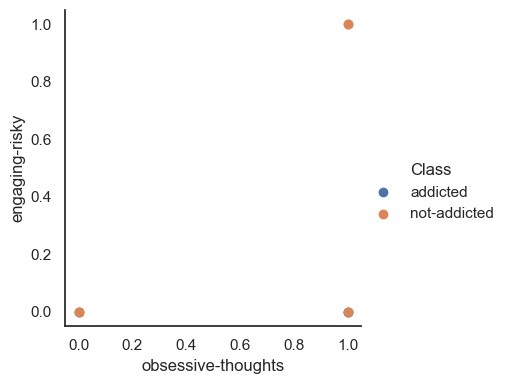

In [4]:
sns.FacetGrid(df, hue = "Class", height = 4).map(plt.scatter, "obsessive-thoughts", "engaging-risky").add_legend()

In [5]:
# info_mapping = {'addicted': 1, 'not-addicted': 0}
# df["Class"] = df["Class"].map(info_mapping)

In [6]:
# PREPARING INPUT OUTPUT
df

,Class,excessive,quit-unsuccessful,loss-focus,reduction,engaging-risky,guilt-shame,cycles,health-issue,demanding,lost-attraction,physical-pain,feeling-distracted,a-u-issue-r,cope-feelings,sex-life-less-satisfying,lost-interest,obsessive-thoughts,Feeling-withdrawal
0,addicted,1,1,1,0,0,1,1,0,1,0,0,1,0,0,0,1,1,1
1,not-addicted,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,not-addicted,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,not-addicted,1,0,1,1,1,1,1,1,1,0,1,1,1,1,0,0,1,1
4,not-addicted,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,1,1,1
5,addicted,0,1,1,1,0,1,1,1,1,1,0,1,1,1,0,1,0,0
6,not-addicted,1,0,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,0
7,addicted,1,1,1,0,0,1,1,1,1,0,0,1,1,1,1,0,1,1


In [7]:
X = df[['excessive', 'quit-unsuccessful', 'loss-focus', 'reduction',
       'engaging-risky', 'guilt-shame', 'cycles', 'health-issue', 'demanding',
       'lost-attraction', 'physical-pain', 'feeling-distracted', 'a-u-issue-r',
       'cope-feelings', 'sex-life-less-satisfying', 'lost-interest',
       'obsessive-thoughts', 'Feeling-withdrawal']].values

y = df[['Class']].values  # Keep 'Class' as the target variable


# Logistick Regression

In [8]:
from sklearn.linear_model import LogisticRegression
import numpy as np
model = LogisticRegression()
model.fit(X, y)
#Accuracy
model.score(X, y)*100

100.0

In [9]:
expected = df['Class']
predicted = model.predict(X)
print(predicted)

['addicted' 'not-addicted' 'not-addicted' 'not-addicted' 'not-addicted'
 'addicted' 'not-addicted' 'addicted']


In [10]:
#zero 0,0,0,1,1,0,0,1,0,1,1,0,1,1,1,0,0,0
# 0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0

#yes = 1
#no = 0

#test 1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,0

In [11]:
import pickle
filename = 'saved_model.sav'
pickle.dump(model,open(filename,'wb'))

In [12]:
expected = df['Class']
load_model = pickle.load(open(filename,'rb'))

In [13]:
load_model.predict([[0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,1,1]])

array(['not-addicted'], dtype=object)